# OOI Data Validation Report
*Lis Henderson (meghan.henderson@stonybrook.edu) June 20, 2018*

Borrows from:

[OOI - Example 1](https://github.com/ooi-data-review/2018-data-workshops/blob/master/bio-examples/Example_1_Requesting_OOI_Data.ipynb)

[OOI - Multi-Instrument and Quickplots](https://github.com/ooi-data-review/2018-data-workshops/blob/master/bio-examples/extras/Multi_instrument_Quick_Plots.ipynb)

[OOI - Synchronous Requests and Basic Plotting](https://github.com/ooi-data-review/2018-data-workshops/blob/master/bio-examples/extras/Synchronous_Requests_and_Basic_Plotting.ipynb)

### Array: Coastal Pioneer 
![alt text](http://oceanobservatories.org/wp-content/uploads/2015/09/CEV-OOI-Coastal-Pioneer-Array-300x169.jpg)

### Platforms:
[array information](http://oceanobservatories.org/array/coastal-pioneer/)

1 - Central Upstream Offshore Profiler, 95m (CP02PMUI)

3 - Upstream Offshore Profiler, 452m (CP02PMUO)

5 - Central Inshore Profiler, 127m (CP0PMCI)

6 - Central Offshore Profiler, 148m (CP02PMCO)

7 - Offshore Profiler, 453m (CP04OSPM)
 

### Goal: 

To explore the seasonal along-shelf and cross-shelf relationships between temperature and productivity. And in the process, look for possible sensor issues.

This is motivated by personal interest in seasonal cycles of temperature and productivity along the Northeast US continental shelf. 

### Summary of findings:

The Coastal Pioneer array does not currently have long (>3 month) overlapping time series for all of the profilers. It is difficult to get a clear look at a full annual cycle. But there are short time periods that are comparable across a few sensors. Even with the annotations and timelines available in the data portal it's a bit of a guess and check process. Could be worth organizing the information into a spreadsheet?

## Setting up shop. 

In [0]:
USERNAME = 'OOIAPI-11HPSKD16NMPXG'
TOKEN =  'U47252GFVPQ4PE'

DATA_API_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

In [0]:
# Import libraries
import requests
import datetime
import matplotlib.pyplot as plt # when pyplot is called later, we can just use 'plt'
# !pip install cmocean
# import cmocean

In [0]:
# Time Processing Routines 
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)

## Looking to see if the fluorometer data includes CTD. Spoiler: It does!

This makes things easier as I only need to pull data from one sensor now. 

In [0]:
# # Instrument Information
# site = 'CP02PMCI'
# node = 'WFP01'
# instrument = '04-FLORTK000'
# method = 'recovered_wfp'
# stream = 'flort_sample'

# data_request_url ='/'.join((API_BASE_URL,site,node,instrument,method,stream))

# params = {
#   'beginDT':'2015-01-01T00:00:00.000Z',
#   'endDT':'2015-02-01T00:00:00.000Z',
#   'limit':1000   
# }

In [0]:
# # Grab the data
# r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
# data = r.json()

Call the first data value to see what the data contains.

And we see that it does contain temperature.

Remember this is in .json format so it contains no metadata.

In [0]:
# data[0]

# Cross-front sensors. 

## Central Inshore, Central Offshore, and Offshore Profilers. May 2015 - May 2016.

#### Instrument and sensor information 
(was going to use inshore profiler but it covers a more truncated time period and contains only telemetered data)

Central Inshore Profiler --  CP02PMCI-WFP01-04-FLORTK000

Central Offshore Profiler -- CP02PMCO-WFP01-04-FLORTK000

Offshore Profiler -- CP04OSPM-WFP01-04-FLORTK000


In [0]:
# Selected Instruments to Plot
instruments = [
  ['CP02PMCI','WFP01','04-FLORTK000','recovered_wfp','flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature','fluorometric_chlorophyll_a','int_ctd_pressure'],
  ['CP02PMCO','WFP01','04-FLORTK000','recovered_wfp','flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature','fluorometric_chlorophyll_a','int_ctd_pressure'],
  ['CP04OSPM','WFP01','04-FLORTK000','recovered_wfp','flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature','fluorometric_chlorophyll_a','int_ctd_pressure'],
]

In [0]:
# Specify additional parameters for the API request 
params = {
  'beginDT':'2015-05-01T00:00:00.000Z',
  'endDT':'2016-05-01T00:00:00.000Z',
  'limit':20000,   
}

Importing the data synchronously as a json file. This means that the data is decimated. Not concerned because I am looking for seasonal patterns, not finer scale.

Though it could be interesting/useful to download netcdf (asynchronous) later to look at certain features on finer scale. 

In [0]:
# Grab the data for each instrument
out1 = []
for jj in range(len(instruments)):
  data_request_url ='/'.join((DATA_API_BASE_URL,instruments[jj][0],instruments[jj][1],instruments[jj][2],instruments[jj][3],instruments[jj][4]))
  r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
  print(r)
  data = r.json()
  print(instruments[jj]) 
  print(len(data))
  time = []
  temp = []
  flort = []
  pressure = []
  for i in range(len(data)):
    time.append(ntp_seconds_to_datetime(data[i]['time']))
    temp.append(data[i][instruments[jj][5]])
    flort.append(data[i][instruments[jj][6]])
    pressure.append(data[i][instruments[jj][7]])
  out1.append({'time':time,'temp':temp,'flort':flort,'pressure':pressure});

<Response [200]>
['CP02PMCI', 'WFP01', '04-FLORTK000', 'recovered_wfp', 'flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature', 'fluorometric_chlorophyll_a', 'int_ctd_pressure']
7553
<Response [200]>
['CP02PMCO', 'WFP01', '04-FLORTK000', 'recovered_wfp', 'flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature', 'fluorometric_chlorophyll_a', 'int_ctd_pressure']
6947
<Response [200]>
['CP04OSPM', 'WFP01', '04-FLORTK000', 'recovered_wfp', 'flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature', 'fluorometric_chlorophyll_a', 'int_ctd_pressure']
4065


In [0]:
data[0] # look at the first value

{'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature': 8.089661223213504,
 'ctdpf_ckl_wfp_instrument_recovered-practical_salinity': 35.102425447601014,
 'driver_timestamp': 3725797992.606042,
 'fluorometric_cdom': 2.0208,
 'fluorometric_cdom_qc_executed': 29,
 'fluorometric_cdom_qc_results': 29,
 'fluorometric_chlorophyll_a': 0.0615,
 'fluorometric_chlorophyll_a_qc_executed': 29,
 'fluorometric_chlorophyll_a_qc_results': 29,
 'ingestion_timestamp': 3725797992.821,
 'int_ctd_pressure': 380.90956363901046,
 'internal_timestamp': 3639427322.0,
 'measurement_wavelength_beta': 0,
 'measurement_wavelength_cdom': 0,
 'measurement_wavelength_chl': 0,
 'optical_backscatter': 0.0017052067456119074,
 'optical_backscatter_qc_executed': 29,
 'optical_backscatter_qc_results': 13,
 'pk': {'deployment': 3,
  'method': 'recovered_wfp',
  'node': 'WFP01',
  'sensor': '04-FLORTK000',
  'stream': 'flort_sample',
  'subsite': 'CP04OSPM',
  'time': 3639427322.0},
 'port_timestamp': 0.0,
 'pre

Plot temperature data across the shelf-break.


In [0]:
# set up uniform colorbar for all 3 profilers. 
min_t = min(out1[0]['temp'] + out1[1]['temp'] + out1[2]['temp'])
max_t = max(out1[0]['temp'] + out1[1]['temp'] + out1[2]['temp'])
print(min_t, max_t)


5.727140967448349 27.425702562241824


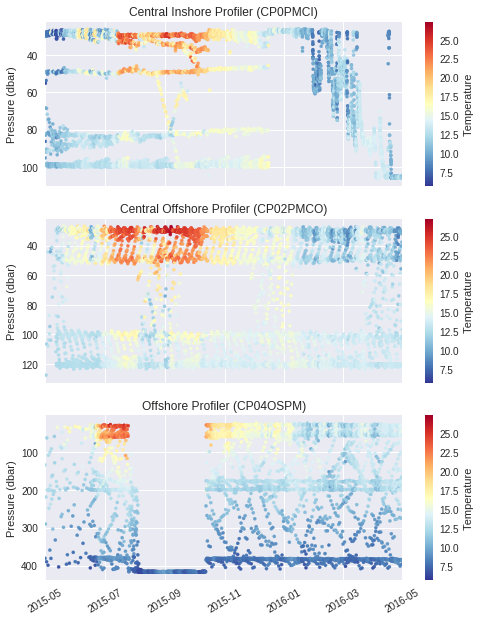

In [0]:
fig,axs = plt.subplots(3, sharex=True, sharey=False, figsize=(8,10))

t0 = axs[0].scatter(out1[0]['time'], out1[0]['pressure'],c=out1[0]['temp'], cmap='RdYlBu_r', s=10, vmin=min_t, vmax=max_t)
t1 = axs[1].scatter(out1[1]['time'], out1[1]['pressure'],c=out1[1]['temp'], cmap='RdYlBu_r', s=10, vmin=min_t, vmax=max_t)
t2 = axs[2].scatter(out1[2]['time'], out1[2]['pressure'],c=out1[2]['temp'], cmap='RdYlBu_r', s=10, vmin=min_t, vmax=max_t)
# vmax and vmin set the colorbar range
  
plt.xlim(datetime.date(2015,5,1),datetime.date(2016,5,1))
plt.xticks(rotation=30)

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()

cbar = fig.colorbar(t0, ax=axs[0], orientation='vertical')
cbar.ax.set_ylabel('Temperature')
cbar = fig.colorbar(t1, ax=axs[1], orientation='vertical')
cbar.ax.set_ylabel('Temperature')
cbar = fig.colorbar(t2, ax=axs[2], orientation='vertical')
cbar.ax.set_ylabel('Temperature')

axs[0].set_ylabel('Pressure (dbar)')
axs[1].set_ylabel('Pressure (dbar)')
axs[2].set_ylabel('Pressure (dbar)')

axs[0].set_title('Central Inshore Profiler (CP0PMCI)')
axs[1].set_title('Central Offshore Profiler (CP02PMCO)')
axs[2].set_title('Offshore Profiler (CP04OSPM)')

fig.subplots_adjust(top=0.9)

We can see that the offshore profiler was stuck at the bottom for a period. This is noted in the annotations. 

The offshore profiler is in water that is not as well mixed surface to bottom as the shallower, more inshore profilers. So it makes sense that there is a stronger gradient in temperature with depth. 

Now let's look at the chlorophyll-a data across the shelf-break.


In [0]:
# set uniform colorbars.
min_f = min(out1[0]['flort'] + out1[1]['flort'] + out1[2]['flort'])
max_f = max(out1[0]['flort'] + out1[1]['flort'] + out1[2]['flort'])
print(min_f, max_f)


0.0123 33.7365


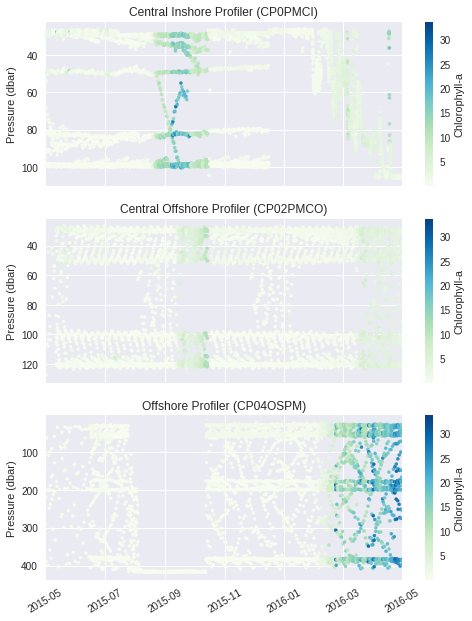

In [0]:
fig,axs = plt.subplots(3, sharex=True, sharey=False, figsize=(8,10))

f0 = axs[0].scatter(out1[0]['time'], out1[0]['pressure'],c=out1[0]['flort'], cmap='GnBu', s=10, vmin=min_f, vmax=max_f)
f1 = axs[1].scatter(out1[1]['time'], out1[1]['pressure'],c=out1[1]['flort'], cmap='GnBu', s=10, vmin=min_f, vmax=max_f)
f2 = axs[2].scatter(out1[2]['time'], out1[2]['pressure'],c=out1[2]['flort'], cmap='GnBu', s=10, vmin=min_f, vmax=max_f)
# vmax and vmin set the colorbar range
  
plt.xlim(datetime.date(2015,5,1),datetime.date(2016,5,1))
plt.xticks(rotation=30)

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()

cbar = fig.colorbar(f0, ax=axs[0], orientation='vertical')
cbar.ax.set_ylabel('Chlorophyll-a')
cbar = fig.colorbar(f1, ax=axs[1], orientation='vertical')
cbar.ax.set_ylabel('Chlorophyll-a')
cbar = fig.colorbar(f2, ax=axs[2], orientation='vertical')
cbar.ax.set_ylabel('Chlorophyll-a')

axs[0].set_ylabel('Pressure (dbar)')
axs[1].set_ylabel('Pressure (dbar)')
axs[2].set_ylabel('Pressure (dbar)')

axs[0].set_title('Central Inshore Profiler (CP0PMCI)')
axs[1].set_title('Central Offshore Profiler (CP02PMCO)')
axs[2].set_title('Offshore Profiler (CP04OSPM)')

fig.subplots_adjust(top=0.9)

The chlorophyll data is neat because we can see blooms in the fall and winter. The fall bloom appears to start at the more inshore profiler and propagate offshore? Unfortunate that the Offshore profiler was sitting at the bottom so we cannot look for the bloom moving offshore. 

The winter bloom shows up strongly at the offshore sensor. Maybe we could see it inshore if looked later in 2016?

## Central Offshore and Offshore Profilers. January 2016 to October 2016

It is unforuntate that all 3 moorings do not equally sample during the winter and spring blooms. In this next part, I will focus first on the spring bloom. See what I can dig up.

Also drop the Central Inshore Profiler. It does not sample the new time period well.

In [0]:
# Selected Instruments to Plot
instruments = [
#   ['CP02PMCI','WFP01','04-FLORTK000','recovered_wfp','flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature','fluorometric_chlorophyll_a','int_ctd_pressure'], # Central Inshore
  ['CP02PMCO','WFP01','04-FLORTK000','recovered_wfp','flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature','fluorometric_chlorophyll_a','int_ctd_pressure'], # Central Offshore
  ['CP04OSPM','WFP01','04-FLORTK000','recovered_wfp','flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature','fluorometric_chlorophyll_a','int_ctd_pressure'], # Offshore
]

In [0]:
# New time period. Smaller time period.
params = {
  'beginDT':'2016-01-01T00:00:00.000Z',
  'endDT':'2016-10-01T00:00:00.000Z',
  'limit':20000,   
}

In [0]:
# Grab the data for each instrument
out = []
for jj in range(len(instruments)):
  data_request_url ='/'.join((DATA_API_BASE_URL,instruments[jj][0],instruments[jj][1],instruments[jj][2],instruments[jj][3],instruments[jj][4]))
  r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
  print(r)
  data = r.json()
  print(instruments[jj]) 
  print(len(data))
  time = []
  temp = []
  flort = []
  pressure = []
  for i in range(len(data)):
    time.append(ntp_seconds_to_datetime(data[i]['time']))
    temp.append(data[i][instruments[jj][5]])
    flort.append(data[i][instruments[jj][6]])
    pressure.append(data[i][instruments[jj][7]])
  out.append({'time':time,'temp':temp,'flort':flort,'pressure':pressure});

<Response [200]>
['CP02PMCO', 'WFP01', '04-FLORTK000', 'recovered_wfp', 'flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature', 'fluorometric_chlorophyll_a', 'int_ctd_pressure']
5719
<Response [200]>
['CP04OSPM', 'WFP01', '04-FLORTK000', 'recovered_wfp', 'flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature', 'fluorometric_chlorophyll_a', 'int_ctd_pressure']
3543


In [0]:
type(out[1]['temp']) # what type of object is temperature? list

list

In [0]:
# set uniform cbar ranges for chla and temperature
# 
min_f = min(out[0]['flort'] + out[1]['flort'])
max_f = max(out[0]['flort'] + out[1]['flort'])
print(min_f, max_f)

min_t = min(out[0]['temp'] + out[1]['temp'])
max_t = max(out[0]['temp'] + out[1]['temp'])
print(min_t, max_t)

0.0116 49.7882
6.851345616937238 24.250613075341455


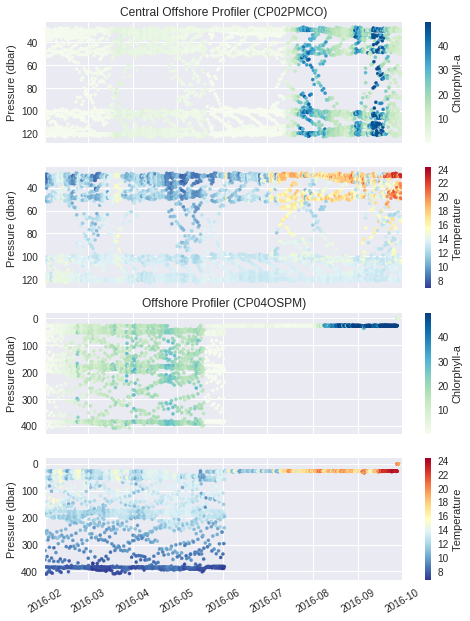

In [0]:
fig,axs = plt.subplots(4, sharex=True, sharey=False, figsize=(8,10))

f1 = axs[0].scatter(out[0]['time'], out[0]['pressure'],c=out[0]['flort'], cmap='GnBu', s=10, vmin=min_f, vmax=max_f) 
t1 = axs[1].scatter(out[0]['time'], out[0]['pressure'],c=out[0]['temp'], cmap='RdYlBu_r', s=10, vmin=min_t, vmax=max_t)
f2 = axs[2].scatter(out[1]['time'], out[1]['pressure'],c=out[1]['flort'], cmap='GnBu', s=10, vmin=min_f, vmax=max_f)
t2 = axs[3].scatter(out[1]['time'], out[1]['pressure'],c=out[1]['temp'], cmap='RdYlBu_r', s=10, vmin=min_t, vmax=max_t)
# vmax and vmin set the colorbar range
  
plt.xlim(datetime.date(2016,2,1),datetime.date(2016,10,1))
plt.xticks(rotation=30)

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()
axs[3].invert_yaxis()

cbar = fig.colorbar(f1, ax=axs[0], orientation='vertical')
cbar.ax.set_ylabel('Chlorphyll-a')
cbar = fig.colorbar(f2, ax=axs[2], orientation='vertical')
cbar.ax.set_ylabel('Chlorphyll-a')
cbar = fig.colorbar(t1, ax=axs[1], orientation='vertical')
cbar.ax.set_ylabel('Temperature')
cbar = fig.colorbar(t2, ax=axs[3], orientation='vertical')
cbar.ax.set_ylabel('Temperature')

axs[0].set_ylabel('Pressure (dbar)')
axs[1].set_ylabel('Pressure (dbar)')
axs[2].set_ylabel('Pressure (dbar)')
axs[3].set_ylabel('Pressure (dbar)')

axs[0].set_title('Central Offshore Profiler (CP02PMCO)')
# axs[1].set_title('Central Offshore Profiler (CP02PMCO)')
axs[2].set_title('Offshore Profiler (CP04OSPM)')

# fig.suptitle('chlorophyll-a across MAB shelf-break')
fig.subplots_adjust(top=0.9)

The Offshore profiler was stuck at the surface for a while. This is noted in the annotations. But we can see later in the year at the Central Offshore Profiler. It looks like the winter bloom occured at both profilers at about the same time but the bloom was more pronounced at the Offshore profiler. 

Similar to in 2015, we see a strong fall bloom at the Central Offshore Profiler.

## Central Inshore and Central Offshore Profilers. October 2016 - October 2017

Now looking at Central Inshore and Central Offshore profilers for a later time period because both profilers seemed fairly consistent here. 

Note that these two profilers are closer together than the Offshore Profiler.  



In [0]:
# Selected Instruments to Plot
instruments = [
  ['CP02PMCI','WFP01','04-FLORTK000','recovered_wfp','flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature','fluorometric_chlorophyll_a','int_ctd_pressure'], # Central Inshore
  ['CP02PMCO','WFP01','04-FLORTK000','recovered_wfp','flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature','fluorometric_chlorophyll_a','int_ctd_pressure'], # Central Offshore
#   ['CP04OSPM','WFP01','04-FLORTK000','recovered_wfp','flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature','fluorometric_chlorophyll_a','int_ctd_pressure'], # Offshore
]

In [0]:
params = {
  'beginDT':'2016-10-01T00:00:00.000Z',
  'endDT':'2017-10-01T00:00:00.000Z',
  'limit':20000,   
}

In [0]:
# Grab the data for each instrument
out = []
for jj in range(len(instruments)):
  data_request_url ='/'.join((DATA_API_BASE_URL,instruments[jj][0],instruments[jj][1],instruments[jj][2],instruments[jj][3],instruments[jj][4]))
  r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
  print(r)
  data = r.json()
  print(instruments[jj]) 
  print(len(data))
  time = []
  temp = []
  flort = []
  pressure = []
  for i in range(len(data)):
    time.append(ntp_seconds_to_datetime(data[i]['time']))
    temp.append(data[i][instruments[jj][5]])
    flort.append(data[i][instruments[jj][6]])
    pressure.append(data[i][instruments[jj][7]])
  out.append({'time':time,'temp':temp,'flort':flort,'pressure':pressure});

<Response [200]>
['CP02PMCI', 'WFP01', '04-FLORTK000', 'recovered_wfp', 'flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature', 'fluorometric_chlorophyll_a', 'int_ctd_pressure']
6764
<Response [200]>
['CP02PMCO', 'WFP01', '04-FLORTK000', 'recovered_wfp', 'flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature', 'fluorometric_chlorophyll_a', 'int_ctd_pressure']
7177


In [0]:
len(out[0]['temp'] + out[1]['temp']) # checking how much the json pulled

13941

In [0]:
# set uniform cbar ranges for chla and temperature
min_f = min(out[0]['flort'] + out[1]['flort'])
max_f = max(out[0]['flort'] + out[1]['flort'])
print(min_f, max_f)

min_t = min(out[0]['temp'] + out[1]['temp'])
max_t = max(out[0]['temp'] + out[1]['temp'])
print(min_t, max_t)

0.0115 20.0772
5.1363900797786535 22.726909190044807


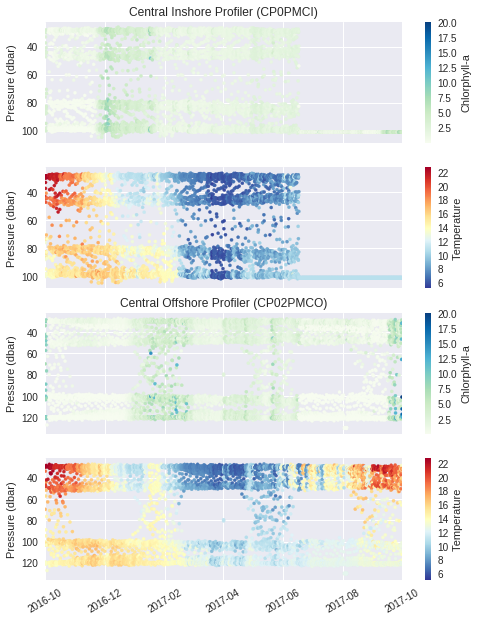

In [0]:
fig,axs = plt.subplots(4, sharex=True, sharey=False, figsize=(8,10))

f1 = axs[0].scatter(out[0]['time'], out[0]['pressure'],c=out[0]['flort'], cmap='GnBu', s=10, vmin=min_f, vmax=max_f) 
t1 = axs[1].scatter(out[0]['time'], out[0]['pressure'],c=out[0]['temp'], cmap='RdYlBu_r', s=10, vmin=min_t, vmax=max_t)
f2 = axs[2].scatter(out[1]['time'], out[1]['pressure'],c=out[1]['flort'], cmap='GnBu', s=10, vmin=min_f, vmax=max_f)
t2 = axs[3].scatter(out[1]['time'], out[1]['pressure'],c=out[1]['temp'], cmap='RdYlBu_r', s=10, vmin=min_t, vmax=max_t)
# vmax and vmin set the colorbar range
  
plt.xlim(datetime.date(2016,10,1),datetime.date(2017,10,1))
plt.xticks(rotation=30)

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()
axs[3].invert_yaxis()

cbar = fig.colorbar(f1, ax=axs[0], orientation='vertical')
cbar.ax.set_ylabel('Chlorphyll-a')
cbar = fig.colorbar(f2, ax=axs[2], orientation='vertical')
cbar.ax.set_ylabel('Chlorphyll-a')
cbar = fig.colorbar(t1, ax=axs[1], orientation='vertical')
cbar.ax.set_ylabel('Temperature')
cbar = fig.colorbar(t2, ax=axs[3], orientation='vertical')
cbar.ax.set_ylabel('Temperature')

axs[0].set_ylabel('Pressure (dbar)')
axs[1].set_ylabel('Pressure (dbar)')
axs[2].set_ylabel('Pressure (dbar)')
axs[3].set_ylabel('Pressure (dbar)')

axs[0].set_title('Central Inshore Profiler (CP0PMCI)')
axs[2].set_title('Central Offshore Profiler (CP02PMCO)')

# fig.suptitle('chlorophyll-a across MAB shelf-break')
fig.subplots_adjust(top=0.9)

The Central Inshore profiler was stuck at the bottom for the latter part of 2017. This is noted in the annotations. 

The 2 profilers show similar temperature and chlorophyll-a trends. Not surprising since they are close together. 

A small winter phytoplankton bloom is detected first at the Central Inshore Profiler and then at the Central Offshore profiler. So the bloom is propagating off the shelf.

The water also looks well-mixed. Makes sense. 

Weird that we see such warm temperatures extending into October at the Central Offshore profiler? But it does also correspond with the beginnings of a phytoplankton bloom. And Fall 2017 was unusually warm...

### Zooming in. November 2016 to March 2017.

Hoping to see more interesting things when looking at a shorter time period. 

In [0]:
# did not change the instruments I am using so don't need to reset that part. 
#
# Trying to pull more fine resoltuion data synchronously. 
params = {
  'beginDT':'2016-11-01T00:00:00.000Z',
  'endDT':'2017-03-01T00:00:00.000Z',
  'limit':20000,   
}

In [0]:
# Grab the data for each instrument
out = []
for jj in range(len(instruments)):
  data_request_url ='/'.join((DATA_API_BASE_URL,instruments[jj][0],instruments[jj][1],instruments[jj][2],instruments[jj][3],instruments[jj][4]))
  r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
  print(r)
  data = r.json()
  print(instruments[jj]) 
  print(len(data))
  time = []
  temp = []
  flort = []
  pressure = []
  for i in range(len(data)):
    time.append(ntp_seconds_to_datetime(data[i]['time']))
    temp.append(data[i][instruments[jj][5]])
    flort.append(data[i][instruments[jj][6]])
    pressure.append(data[i][instruments[jj][7]])
  out.append({'time':time,'temp':temp,'flort':flort,'pressure':pressure});

<Response [200]>
['CP02PMCI', 'WFP01', '04-FLORTK000', 'recovered_wfp', 'flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature', 'fluorometric_chlorophyll_a', 'int_ctd_pressure']
2851
<Response [200]>
['CP02PMCO', 'WFP01', '04-FLORTK000', 'recovered_wfp', 'flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature', 'fluorometric_chlorophyll_a', 'int_ctd_pressure']
3346


In [0]:
len(out[0]['temp'] + out[1]['temp'])

6197

pulled less data this time. But the sampling resolution for the wire-following flourometer is every 4 seconds. So we should be able to get more? Maybe better to use asynchronous data pull in the future but for this excercise I want to get a cursory look at shelf-break dynamics. 

In [0]:
# set uniform cbar ranges for chla and temperature
min_f = min(out[0]['flort'] + out[1]['flort'])
max_f = max(out[0]['flort'] + out[1]['flort'])
print(min_f, max_f)

min_t = min(out[0]['temp'] + out[1]['temp'])
max_t = max(out[0]['temp'] + out[1]['temp'])
print(min_t, max_t)

0.0216 16.6428
6.5107320742618455 19.96965368809273


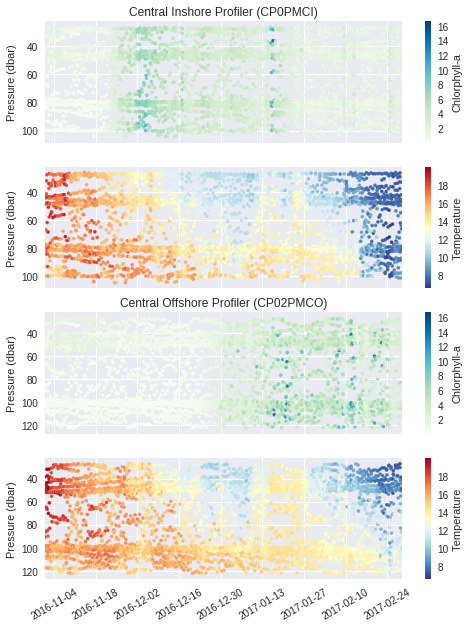

In [0]:
fig,axs = plt.subplots(4, sharex=True, sharey=False, figsize=(8,10))

f1 = axs[0].scatter(out[0]['time'], out[0]['pressure'],c=out[0]['flort'], cmap='GnBu', s=10, vmin=min_f, vmax=max_f) 
t1 = axs[1].scatter(out[0]['time'], out[0]['pressure'],c=out[0]['temp'], cmap='RdYlBu_r', s=10, vmin=min_t, vmax=max_t)
f2 = axs[2].scatter(out[1]['time'], out[1]['pressure'],c=out[1]['flort'], cmap='GnBu', s=10, vmin=min_f, vmax=max_f)
t2 = axs[3].scatter(out[1]['time'], out[1]['pressure'],c=out[1]['temp'], cmap='RdYlBu_r', s=10, vmin=min_t, vmax=max_t)
# vmax and vmin set the colorbar range
  
plt.xlim(datetime.date(2016,11,1),datetime.date(2017,3,1))
plt.xticks(rotation=30)

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()
axs[3].invert_yaxis()

cbar = fig.colorbar(f1, ax=axs[0], orientation='vertical')
cbar.ax.set_ylabel('Chlorphyll-a')
cbar = fig.colorbar(f2, ax=axs[2], orientation='vertical')
cbar.ax.set_ylabel('Chlorphyll-a')
cbar = fig.colorbar(t1, ax=axs[1], orientation='vertical')
cbar.ax.set_ylabel('Temperature')
cbar = fig.colorbar(t2, ax=axs[3], orientation='vertical')
cbar.ax.set_ylabel('Temperature')

axs[0].set_ylabel('Pressure (dbar)')
axs[1].set_ylabel('Pressure (dbar)')
axs[2].set_ylabel('Pressure (dbar)')
axs[3].set_ylabel('Pressure (dbar)')

axs[0].set_title('Central Inshore Profiler (CP0PMCI)')
axs[2].set_title('Central Offshore Profiler (CP02PMCO)')

# fig.suptitle('chlorophyll-a across MAB shelf-break')
fig.subplots_adjust(top=0.9)

This looks much better. There are no major gaps during this time period.

The lag between Central Inshore and Central Offshore is much more obvious now. 

At the end of December 2016, there is a spike in phytoplankton that also corresponds with a small spike in temperature. Maybe worth looking into what other factors were at play during that time? 

# Along-front sensors.


## Offshore Profiler and Upstream Offshore Profiler. October 2016 - November 2016.

The Pioneer array is also set up with platforms to detect along-shelf processes. There is a frontal jet that flows equatorward along the shelf-break. I wanted to look at the 2 upstream profilers (Upstream Inshore and Upstream Offshore) relative to their downstream equivilents (Inshore and Offshore Profilers). But the Inshore profiler is already known to not have the data I want so I stuck with just the Offshore and Upstream Offshore Profilers. Even then, the profilers did not align well. Lots of periods where the profiler was stuck at the surface. 

Offshore Profiler --> Upstream Offshore Profiler

In [0]:
# Selected Instruments to Plot
instruments = [
#   ['CP03ISSM','RID27','02-FLORTD000','telemetered','flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature','fluorometric_chlorophyll_a','int_ctd_pressure'], # Inshore
#   ['CP02PMUI','WFP01','04-FLORTK000','recovered_wfp','flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature','fluorometric_chlorophyll_a','int_ctd_pressure'], # Upstream Inshore
  ['CP04OSPM','WFP01','04-FLORTK000','recovered_wfp','flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature','fluorometric_chlorophyll_a','int_ctd_pressure'], # Offshore
  ['CP02PMUO','WFP01','04-FLORTK000','recovered_wfp','flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature','fluorometric_chlorophyll_a','int_ctd_pressure'], # Upstream Offshore
]

In [0]:
# Additional API parameters. 
params = {
  'beginDT':'2016-10-01T00:00:00.000Z',
  'endDT':'2016-11-01T00:00:00.000Z',
  'limit':10000,   # for some reason this wouldn't work when I set the sampling to 20,000
}

In [0]:
# Grab the data for each instrument
out_jet = []
for jj in range(len(instruments)):
  data_request_url ='/'.join((DATA_API_BASE_URL,instruments[jj][0],instruments[jj][1],instruments[jj][2],instruments[jj][3],instruments[jj][4]))
  r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
  print(r)
  data = r.json()
  print(instruments[jj]) 
  print(len(data))
  time = []
  temp = []
  flort = []
  pressure = []
  for i in range(len(data)):
    time.append(ntp_seconds_to_datetime(data[i]['time']))
    temp.append(data[i][instruments[jj][5]])
    flort.append(data[i][instruments[jj][6]])
    pressure.append(data[i][instruments[jj][7]])
  out_jet.append({'time':time,'temp':temp,'flort':flort,'pressure':pressure});

<Response [200]>
['CP04OSPM', 'WFP01', '04-FLORTK000', 'recovered_wfp', 'flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature', 'fluorometric_chlorophyll_a', 'int_ctd_pressure']
19457
<Response [200]>
['CP02PMUO', 'WFP01', '04-FLORTK000', 'recovered_wfp', 'flort_sample', 'ctdpf_ckl_wfp_instrument_recovered-ctdpf_ckl_seawater_temperature', 'fluorometric_chlorophyll_a', 'int_ctd_pressure']
964


In [0]:
# set uniform cbar ranges for chla and temperature
# 
min_f = min(out_jet[0]['flort'] + out_jet[1]['flort'])
max_f = max(out_jet[0]['flort'] + out_jet[1]['flort'])
print(min_f, max_f)

min_t = min(out_jet[0]['temp'] + out_jet[1]['temp'])
max_t = max(out_jet[0]['temp'] + out_jet[1]['temp'])
print(min_t, max_t)

0.0 46.464
6.378798648028487 23.418538981201483


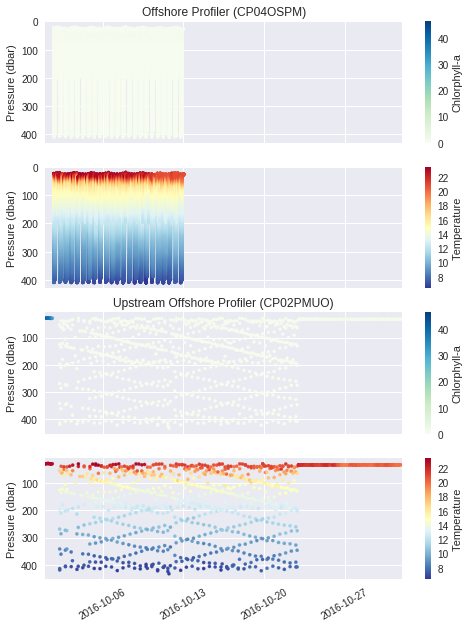

In [0]:
fig,axs = plt.subplots(4, sharex=True, sharey=False, figsize=(8,10))

f1 = axs[0].scatter(out_jet[0]['time'], out_jet[0]['pressure'],c=out_jet[0]['flort'], cmap='GnBu', s=10, vmin=min_f, vmax=max_f) 
t1 = axs[1].scatter(out_jet[0]['time'], out_jet[0]['pressure'],c=out_jet[0]['temp'], cmap='RdYlBu_r', s=10, vmin=min_t, vmax=max_t)
f2 = axs[2].scatter(out_jet[1]['time'], out_jet[1]['pressure'],c=out_jet[1]['flort'], cmap='GnBu', s=10, vmin=min_f, vmax=max_f)
t2 = axs[3].scatter(out_jet[1]['time'], out_jet[1]['pressure'],c=out_jet[1]['temp'], cmap='RdYlBu_r', s=10, vmin=min_t, vmax=max_t)
# vmax and vmin set the colorbar range
  
plt.xlim(datetime.date(2016,10,1),datetime.date(2016,11,1))
plt.xticks(rotation=30)

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()
axs[3].invert_yaxis()

cbar = fig.colorbar(f1, ax=axs[0], orientation='vertical')
cbar.ax.set_ylabel('Chlorphyll-a')
cbar = fig.colorbar(f2, ax=axs[2], orientation='vertical')
cbar.ax.set_ylabel('Chlorphyll-a')
cbar = fig.colorbar(t1, ax=axs[1], orientation='vertical')
cbar.ax.set_ylabel('Temperature')
cbar = fig.colorbar(t2, ax=axs[3], orientation='vertical')
cbar.ax.set_ylabel('Temperature')

axs[0].set_ylabel('Pressure (dbar)')
axs[1].set_ylabel('Pressure (dbar)')
axs[2].set_ylabel('Pressure (dbar)')
axs[3].set_ylabel('Pressure (dbar)')

axs[0].set_title('Offshore Profiler (CP04OSPM)')
axs[2].set_title('Upstream Offshore Profiler (CP02PMUO)')

# fig.suptitle('chlorophyll-a across MAB shelf-break')
fig.subplots_adjust(top=0.9)

It looks like these profilers had different sampling settings?  Not clear from the Observation and Sampling approach PDF and not noted in the Data Portal annotations. Should pull complete data asynchronously to check.

Will take some more digging to find decent overlapping periods between the along-front sensors. 


Likely next steps:
- Look at shorter time periods. 3-4 months max.
- Pull data asynchronously to try and get more data points. Not totally clear on why json works better for some requests than others. 
- pay attention to annotations about the profiler being stuck at the surface/bottom when selecting time periods